In [4]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px


In [5]:
stock = yf.download('^NSEI',start = '2009-1-1',end='2024-8-12')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
stock

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2009-01-02,3046.750000,3079.850098,3021.800049,3034.600098,0
2009-01-05,3121.449951,3131.949951,3056.449951,3058.750000,0
2009-01-06,3112.800049,3141.800049,3056.100098,3121.500000,0
2009-01-07,2920.399902,3147.199951,2888.199951,3112.800049,0
2009-01-09,2873.000000,2929.850098,2810.250000,2919.949951,0
...,...,...,...,...,...
2024-08-05,24055.599609,24350.050781,23893.699219,24302.849609,487000
2024-08-06,23992.550781,24382.599609,23960.400391,24189.849609,312300


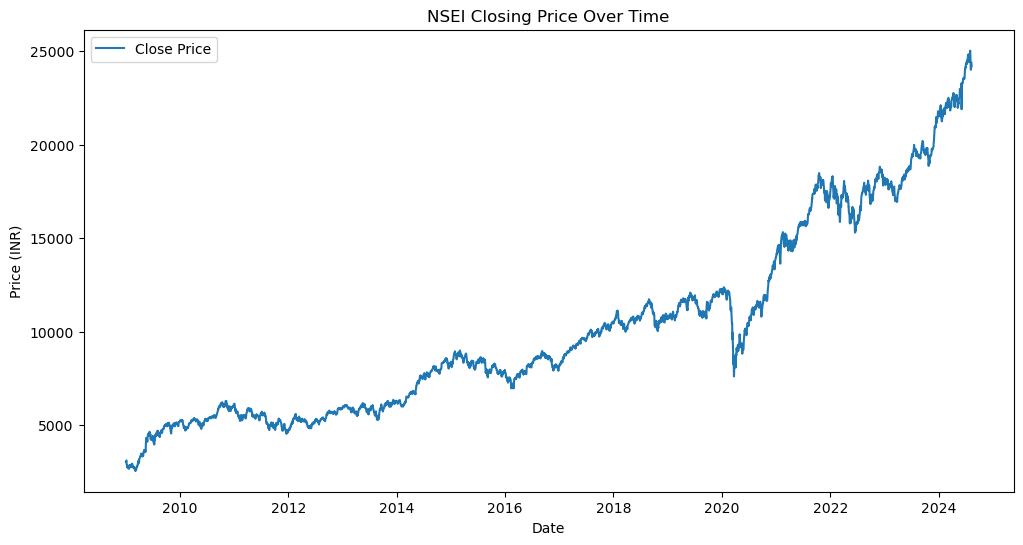

In [8]:

plt.figure(figsize=(12, 6))
plt.plot(stock['Close'], label='Close Price') 
plt.title('NSEI Closing Price Over Time') 
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

In [9]:

stock['50_MA'] = stock['Close'].rolling(window=50).mean()
stock['200_MA'] = stock['Close'].rolling(window=200).mean()

In [14]:

stock['Target'] = stock['Close'].shift(-1)


stock.dropna(inplace=True)


features = stock[['Close', '50_MA', '200_MA']]
target = stock['Target']


print(features.head())
print(target.head())


Price             Close        50_MA       200_MA
Ticker            ^NSEI                          
Date                                             
2009-10-30  4711.700195  4844.306016  3926.758499
2009-11-03  4563.899902  4847.826016  3934.344248
2009-11-04  4710.799805  4852.864014  3942.290997
2009-11-05  4765.549805  4860.293008  3950.554746
2009-11-06  4796.149902  4867.147002  3959.933496
Date
2009-10-30    4563.899902
2009-11-03    4710.799805
2009-11-04    4765.549805
2009-11-05    4796.149902
2009-11-06    4898.399902
Name: Target, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}")
print(f"Testing data: {X_test.shape}")


Training data: (2899, 3)
Testing data: (725, 3)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 75.20375172937977
Root Mean Squared Error: 112.46004327827859


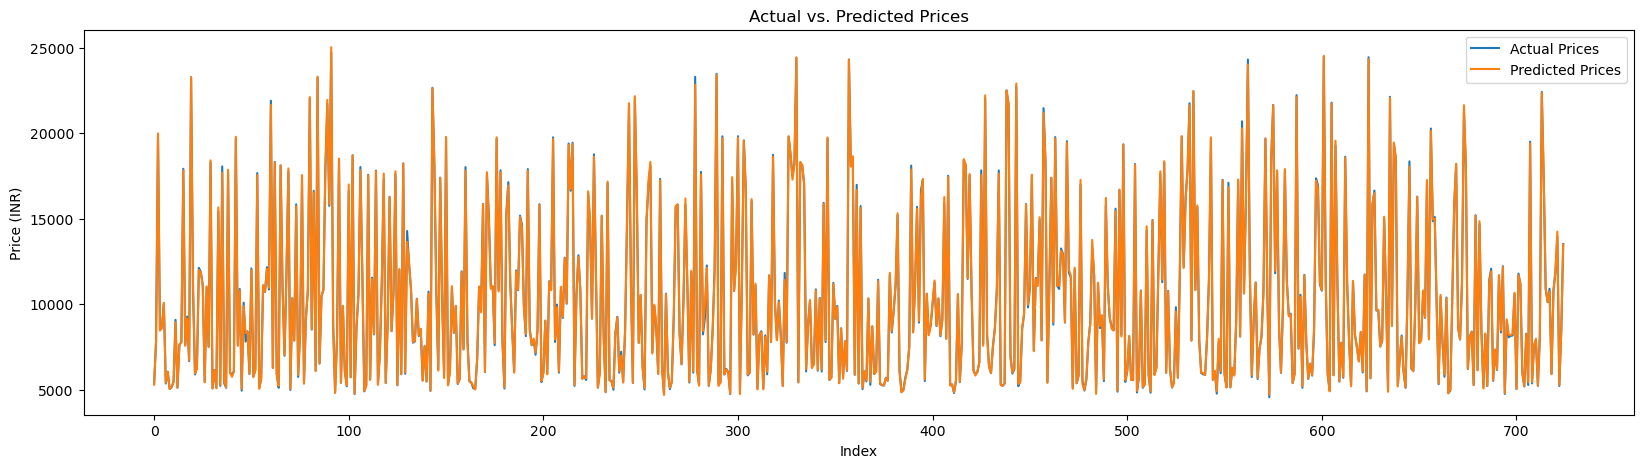

In [22]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

In [30]:
def get_moving_averages(date):
  
  date = pd.to_datetime(date)

 
  data_up_to_date = stock.loc[:date]

  
  ma50 = data_up_to_date['Close'].rolling(window=50).mean().iloc[-1]
  ma200 = data_up_to_date['Close'].rolling(window=200).mean().iloc[-1]

  return ma50, ma200


date_input = input("Enter the date (YYYY-MM-DD): ")


ma50, ma200 = get_moving_averages(date_input)
print(f"50-day moving average on {date_input}: {ma50}")
print(f"200-day moving average on {date_input}: {ma200}")


Enter the date (YYYY-MM-DD):  2009-12-08


50-day moving average on 2009-12-08: Ticker
^NSEI   NaN
Name: 2009-12-08 00:00:00, dtype: float64
200-day moving average on 2009-12-08: Ticker
^NSEI   NaN
Name: 2009-12-08 00:00:00, dtype: float64


In [ ]:
import numpy as np
def predict_price(close, ma50, ma200):

  input_data = np.array([[close, ma50, ma200]])
  prediction = model.predict(input_data)
  return prediction[0]


close_price = float(input("Enter today's closing price: "))
ma50 = float(input("Enter today's 50-day moving average: "))
ma200 = float(input("Enter today's 200-day moving average: "))

predicted_price = predict_price(close_price, ma50, ma200)
print(f"Predicted closing price for tomorrow: {predicted_price}")


Enter today's closing price: 24297
Enter today's 50-day moving average: 23840.16390625
Enter today's 200-day moving average: 21974.151201171873
Predicted closing price for tomorrow: 24309.983759284412


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [ ]:
def get_moving_averages(date):
  
  date = pd.to_datetime(date)

  
  data_up_to_date = stock.loc[:date]

  
  ma50 = data_up_to_date['Close'].rolling(window=50).mean().iloc[-1]
  ma200 = data_up_to_date['Close'].rolling(window=200).mean().iloc[-1]

  return ma50, ma200


date_input = input("Enter the date (YYYY-MM-DD): ")


ma50, ma200 = get_moving_averages(date_input)
print(f"50-day moving average on {date_input}: {ma50}")
print(f"200-day moving average on {date_input}: {ma200}")
a = ma50
b = ma200

def predict_price(close, ma50, ma200):
  
  input_data = scaler.transform(np.array([[close, ma50, ma200]]))
  prediction = model.predict(input_data)
  return prediction[0]

close_price = float(input("Enter today's closing price: "))
ma50 = a
ma200 = b

predicted_price = predict_price(close_price, ma50, ma200)
print(f"Predicted closing price for tomorrow: {predicted_price}")

In [ ]:

stock['50_MA'] = stock['Close'].rolling(window=50).mean()


stock['200_MA'] = stock['Close'].rolling(window=200).mean()


stock.dropna(inplace=True)


In [ ]:

stock['Target'] = stock['Close'].shift(-1)


stock.dropna(inplace=True)


features = stock[['Close', '50_MA', '200_MA']]
target = stock['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:

model = RandomForestRegressor(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:

predictions = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 83.81657529510719
Root Mean Squared Error: 128.55415022707766


In [40]:

specific_date = input("Enter the date (YYYY-MM-DD): ")


specific_features = stock.loc[specific_date, ['Close', '50_MA', '200_MA']]

specific_features = specific_features.values.reshape(1, -1)


predicted_price = model.predict(specific_features)

print(f"Predicted price for {specific_date}: {predicted_price[0]}")
print(f"50-day MA: {stock.loc[specific_date, '50_MA']}")
print(f"200-day MA: {stock.loc[specific_date, '200_MA']}")


Enter the date (YYYY-MM-DD):  2009-12-08


Predicted price for 2009-12-08: 5149.924245700526
50-day MA: Ticker
    4990.357021
Name: 2009-12-08 00:00:00, dtype: float64
200-day MA: Ticker
    4206.189999
Name: 2009-12-08 00:00:00, dtype: float64


In [42]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_test , predictions)

0.9995029191627727

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

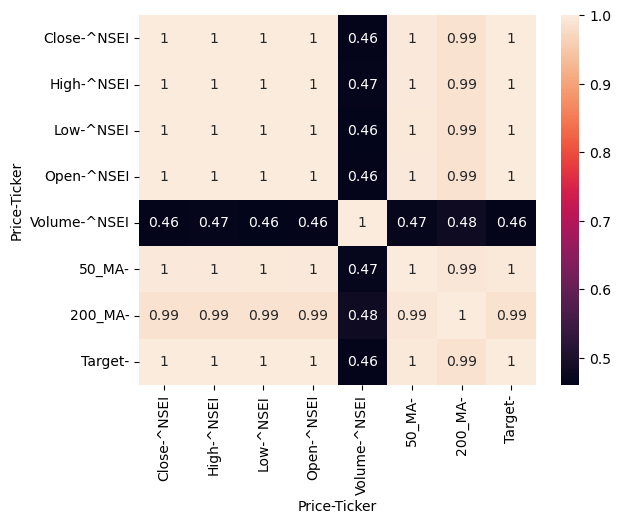

In [50]:
sns.heatmap(stock.corr(),annot = True)